# Replicating an FSL analysis

You may need:

* [ds114 FMRI image]({{ site.url }}{{ site.baseurl }}/data/ds114_sub009_t2r1.nii).
* [ds114 stimulus file]({{ site.url }}{{ site.baseurl }}/data/ds114_sub009_t2r1_cond.txt).
* [ds114 design file]({{ site.url }}{{ site.baseurl }}/data/ds114_sub009_t2r1_design.fsf).

If you don't have FSL on your computer, you will also need to download and
unpack the [ds114 FEAT analysis directory archive]({{ site.url }}{{ site.baseurl
}}/data/ds114_sub009_t2r1_feat.zip).

I start by running an FSL analysis on the `ds114_sub009_t2r1.nii` image.

I chose the following options for simplicity of the model:

* stats only (not preprocessing);
* turn off FILM prewhitening;
* use the `ds114_sub009_t2r1_cond.txt` 3 column file to define my events;
* use the double gamma HRF;
* turn off "Add temporal derivative";
* turn off "Apply temporal filtering".

See the file `ds114_sub009_t2r1_simple.fsf` for the analysis definition.

In [1]:
# We will need these later
from os import listdir  # To list the files in a directory
from os.path import join as pjoin  # To build file paths

In [2]:
# Our standard imports
import numpy as np  # The array library
import numpy.linalg as npl  # The linear algebra sub-package
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt  # The plotting library
%matplotlib inline

In [3]:
# The library to load images
# You might need to do "pip install nibabel" in the Terminal
import nibabel as nib

We investigate the FEAT output directory:

In [4]:
feat_dir = 'ds114_sub009_t2r1.feat'
listdir(feat_dir)

['design_cov.png',
 'design.png',
 'design.con',
 'report_log.html',
 'design.ppm',
 'absbrainthresh.txt',
 'design_cov.ppm',
 'mask.nii.gz',
 'design.trg',
 'thresh_zstat1.nii.gz',
 'rendered_thresh_zstat1.png',
 'cluster_zstat1.html',
 'tsplot',
 'design.mat',
 'design.frf',
 'lmax_zstat1.txt',
 '.files',
 'report_prestats.html',
 '.ramp.gif',
 'mean_func.nii.gz',
 'report_reg.html',
 'report_poststats.html',
 'logs',
 'design.min',
 'design.fsf',
 'report_stats.html',
 'cluster_zstat1.txt',
 'rendered_thresh_zstat1.nii.gz',
 'custom_timing_files',
 'report.html',
 'thresh_zstat1.vol',
 'example_func.nii.gz',
 'cluster_mask_zstat1.nii.gz',
 'stats']

There is a `stats` subdirectory in the FEAT directory, with some interesting files:

In [5]:
stats_dir = pjoin(feat_dir, 'stats')
listdir(stats_dir)

['threshac1.nii.gz',
 'tstat1.nii.gz',
 'varcope1.nii.gz',
 'dof',
 'smoothness',
 'pe1.nii.gz',
 'cope1.nii.gz',
 'sigmasquareds.nii.gz',
 'logfile',
 'zstat1.nii.gz']

The `pe1.nii.gz` contains the Parameter Estimate for the regressor:

In [6]:
pe_fname = pjoin(stats_dir, 'pe1.nii.gz')
pe_fname

'ds114_sub009_t2r1.feat/stats/pe1.nii.gz'

It's an image, with one parameter estimate per voxel:

In [7]:
pe_img = nib.load(pe_fname)
pe_data = pe_img.get_fdata()
pe_data.shape

(64, 64, 30)

Here's the 15th slab in the Parameter Estimate volume:

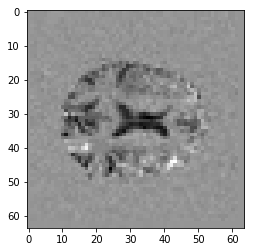

In [8]:
plt.imshow(pe_data[:, :, 14], cmap='gray')

Compare this image to the [first_activation notebook](https://github.com/matthew-brett/msc_imaging/blob/master/first_activation.ipynb) estimate we found.

The design matrix:

In [9]:
design_fname = pjoin(feat_dir, 'design.mat')
design_fname

'ds114_sub009_t2r1.feat/design.mat'

In [10]:
# Read contents of the design file
with open(design_fname, 'rt') as fobj:
    design = fobj.read()
print(design)

/NumWaves	1
/NumPoints	173
/PPheights		1.280507e+00

/Matrix
-4.855490e-01	
-4.855491e-01	
-4.855491e-01	
-4.855491e-01	
-4.831242e-01	
-2.687152e-01	
2.311866e-01	
5.548245e-01	
6.547042e-01	
6.450099e-01	
6.010161e-01	
5.601737e-01	
5.345309e-01	
5.219966e-01	
5.169302e-01	
5.151719e-01	
5.122089e-01	
2.976517e-01	
-2.022853e-01	
-5.259232e-01	
-6.258029e-01	
-6.161086e-01	
-5.721148e-01	
-5.312724e-01	
-5.056295e-01	
-4.930953e-01	
-4.880289e-01	
-4.862706e-01	
-4.833076e-01	
-2.687504e-01	
2.311866e-01	
5.548245e-01	
6.547042e-01	
6.450099e-01	
6.010161e-01	
5.601737e-01	
5.345309e-01	
5.219966e-01	
5.169302e-01	
5.151719e-01	
5.122089e-01	
2.976517e-01	
-2.022853e-01	
-5.259232e-01	
-6.258029e-01	
-6.161086e-01	
-5.721148e-01	
-5.312724e-01	
-5.056295e-01	
-4.930953e-01	
-4.880289e-01	
-4.862706e-01	
-4.833076e-01	
-2.687504e-01	
2.311866e-01	
5.548245e-01	
6.547042e-01	
6.450099e-01	
6.010161e-01	
5.601737e-01	
5.345309e-01	
5.219966e-01	
5.169302e-01	
5.151719e-01	
5.122089e-01	

In [11]:
regressor = np.loadtxt(design_fname, comments='/')
regressor

array([-0.4855, -0.4855, -0.4855, -0.4855, -0.4831, -0.2687,  0.2312,
        0.5548,  0.6547,  0.645 ,  0.601 ,  0.5602,  0.5345,  0.522 ,
        0.5169,  0.5152,  0.5122,  0.2977, -0.2023, -0.5259, -0.6258,
       -0.6161, -0.5721, -0.5313, -0.5056, -0.4931, -0.488 , -0.4863,
       -0.4833, -0.2688,  0.2312,  0.5548,  0.6547,  0.645 ,  0.601 ,
        0.5602,  0.5345,  0.522 ,  0.5169,  0.5152,  0.5122,  0.2977,
       -0.2023, -0.5259, -0.6258, -0.6161, -0.5721, -0.5313, -0.5056,
       -0.4931, -0.488 , -0.4863, -0.4833, -0.2688,  0.2312,  0.5548,
        0.6547,  0.645 ,  0.601 ,  0.5602,  0.5345,  0.522 ,  0.5169,
        0.5152,  0.5122,  0.2977, -0.2023, -0.5259, -0.6258, -0.6161,
       -0.5721, -0.5313, -0.5056, -0.4931, -0.488 , -0.4863, -0.4833,
       -0.2688,  0.2312,  0.5548,  0.6547,  0.645 ,  0.601 ,  0.5602,
        0.5345,  0.522 ,  0.5169,  0.5152,  0.5122,  0.2977, -0.2023,
       -0.5259, -0.6258, -0.6161, -0.5721, -0.5313, -0.5056, -0.4931,
       -0.488 , -0.4

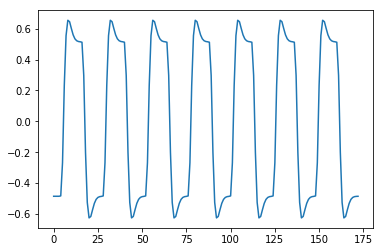

In [12]:
plt.plot(regressor)

In [13]:
np.mean(regressor)

-1.1560693609863562e-09

Remember the [all_one_voxel notebook](https://nbviewer.jupyter.org/github/matthew-brett/msc_imaging/blob/master/all_one_voxel.ipynb)?

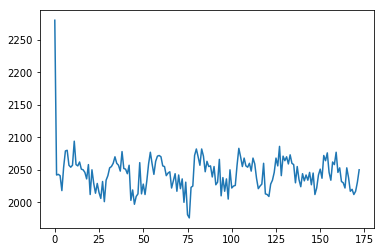

In [14]:
img = nib.load('ds114_sub009_t2r1.nii')
data = img.get_fdata()
voxel_time_course = data[42, 32, 19]
plt.plot(voxel_time_course)

Let's do our own regression:

In [15]:
# The number of elements in the data (scans)
N = data.shape[-1]
N

173

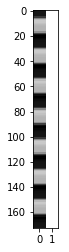

In [16]:
# The design matrix for a simple regression
X = np.ones((N, 2))
X[:, 0] = regressor
plt.imshow(X, cmap='gray', aspect=0.1)

In [17]:
# Estimate the slope and intercept for this regression
y = voxel_time_course
B = npl.pinv(X).dot(y)
B

array([  27.6368, 2044.7919])

What does FSL get for slope estimate at this voxel?

In [18]:
pe_data[42, 32, 19]

27.6368465423584

Remember our contrast, to select the slope of the regressor?

In [19]:
c = np.array([1, 0])
c.dot(B)

27.63684567343443

FSL has Contrast Of Parameter Estimate (COPE) files:

In [20]:
cope_fname = pjoin(stats_dir, 'cope1.nii.gz')
cope_img = nib.load(cope_fname)
cope_data = cope_img.get_fdata()
cope_data[42, 32, 19]

27.6368465423584

FSL also has a `sigmasquareds.nii.gz` file, that contains the variance estimate at each voxel:

In [21]:
ss_fname = pjoin(stats_dir, 'sigmasquareds.nii.gz')
ss_img = nib.load(ss_fname)
ss_data = ss_img.get_fdata()
ss_data[42, 32, 19]

600.3792724609375

Remember the fitted data, and the residuals?

In [22]:
fitted = X.dot(B)
residuals = y - fitted

We can calculate the variance with the degrees of freedom and the residuals:

In [23]:
# Degrees of freedom in the design.
# This is the number of independent columns in the design
df_design = npl.matrix_rank(X)
df_design

2

In [24]:
# Degrees of freedom remaining in the data
df_data = N - df_design
df_data

171

In [25]:
variance = np.sum(residuals ** 2) / df_data
variance

603.8902548558667

Oops - that is not the same as FSL.  It turns out FSL thinks the data has an extra degree of freedom, in its calculation of variance:

In [26]:
fsl_df = df_data + 1
fsl_variance = np.sum(residuals ** 2) / fsl_df
fsl_variance

600.3792650020536

As you will see, it has (as of FSL 6.0) corrected for this - er - version of variance, in the output of the t-test.

Now let's do a t-test by hand.

In [27]:
# Top of t - same as COPE
c = np.array([1, 0])
top_of_t = c.dot(B)
top_of_t

27.63684567343443

In [28]:
# Bottom of t - the standard error of the top part
design_part = c.dot(npl.inv(X.T.dot(X))).dot(c)
bottom_of_t = np.sqrt(fsl_variance * design_part)
bottom_of_t

3.6412936068015513

In [29]:
t = top_of_t / bottom_of_t
t

7.589842692666069

What does FSL get for this voxel?

In [30]:
t_fname = pjoin(stats_dir, 'tstat1.nii.gz')
t_img = nib.load(t_fname)
t_data = t_img.get_fdata()
t_data[42, 32, 19]

7.589842796325684

Finally, the z value.  From FSL:

In [31]:
z_fname = pjoin(stats_dir, 'zstat1.nii.gz')
z_img = nib.load(z_fname)
z_data = z_img.get_fdata()
z_data[42, 32, 19]

7.036045551300049

This comes about from the p value for the t statistic, transformed back to a Z score:

In [32]:
# Get p value from t distribution
import scipy.stats as sps  # Statistical distributions
p = sps.t(fsl_df).sf(t)  # Survival function (1-cdf)
p

9.695004018853872e-13

In [33]:
# Get matching z score from p value
z = sps.norm().isf(p)  # The Inverse Survival Function
z

7.038801702666201

Save these files out to check that R gives the same values:

In [34]:
np.savetxt('voxel_time_course.txt', voxel_time_course)
np.savetxt('regressor.txt', regressor)

Here is the R code to do a simple regression on those data files:

```
# Simple regression model in R
# Load the voxel time course
voxels = read.table('voxel_time_course.txt')$V1
# Load the convolved regressor
regressor = read.table('regressor.txt')$V1
# Fit linear model, where intercept is automatically added
res = lm(voxels ~ regressor)
# Show the result
print(summary(res))
```

On my machine that gives:

```
Call:
lm(formula = voxels ~ regressor)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.435 -10.818  -2.201   9.052 248.627 

Coefficients:
            Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 2044.792      1.868 1094.443  < 2e-16 ***
regressor     27.637      3.652    7.568 2.25e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.57 on 171 degrees of freedom
Multiple R-squared:  0.2509,	Adjusted R-squared:  0.2465 
F-statistic: 57.27 on 1 and 171 DF,  p-value: 2.247e-12
```

In [35]:
# The residual standard error
np.sqrt(variance)

24.574178620166876